# Basics of picking

Within the introduction we introduced the different wave phases and some of their principle characteristics (really basic). In seismology often arrivals of P- and/or S-waves are of interest. These are the times, the first signal of phase arrives at the seismic station. But how can we decide, when the certain phase arrives, so, how do we pick?

To understand the principles of picking on filtered, perhaps noisy data we will step back and start with an easy synthetic example, a sinus signal:

In [28]:
# Import of packages
import numpy as num
from scipy import signal as ssignal

import matplotlib.pyplot as plt

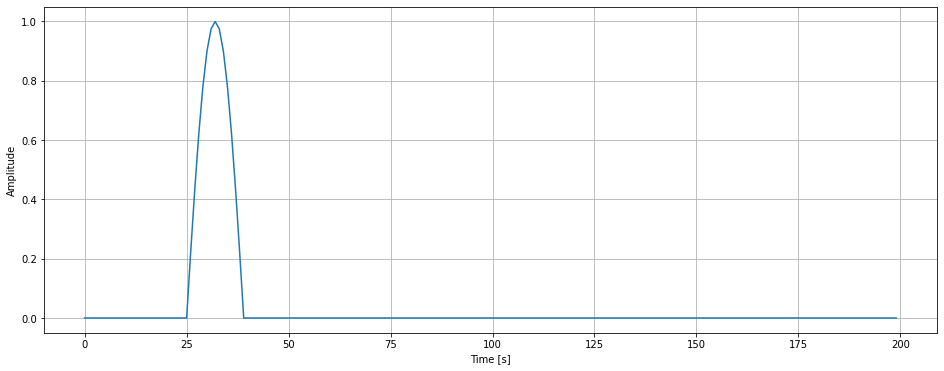

In [56]:
# Create time array
time = num.arange(200)

# Generation of simple half sinuisoidal signal centered at 25 s
signal = num.zeros(time.shape[0])
signal[25:40] = num.sin(num.linspace(0, num.pi, 15))

# Plot the generate signal
fig, axes = plt.subplots(figsize=(16, 6))
axes.plot(time, signal)
axes.grid()
axes.set_xlabel('Time [s]')
axes.set_ylabel('Amplitude')
plt.show();

## Picking on unfiltered and noise free signals

The generated signal was recorded for 50 seconds and shows a half sinusoidal after 25 s. If we would pick the onset of this assuming it to be a seismic phase of interest, it would be at 25 s. 

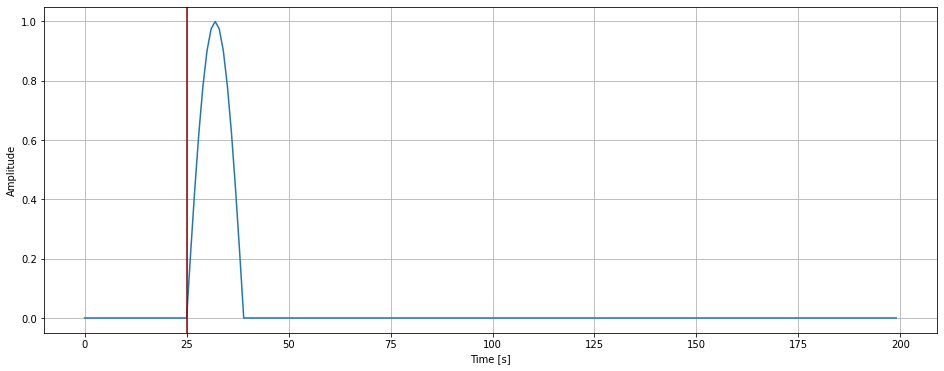

In [57]:
fig, axes = plt.subplots(figsize=(16, 6))

# Plot the generated signal
axes.plot(time, signal)

# Pick
axes.axvline(25, color='darkred')

axes.grid()
axes.set_xlabel('Time [s]')
axes.set_ylabel('Amplitude')
plt.show();

## Picking on filtered and noise free signals

In this step we will now apply different simple filtering techniques and check their effect on the waveforms and the corresponding picks.
The two filtering techniques applied are methods shipped with `scipy`: [lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter) and [filtfilt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt). We will apply both filters to our input signal and first compare the resulting signals.

Let's filter below 0.5 Hz using a 3<sup>rd</sup> order butterworth filter:

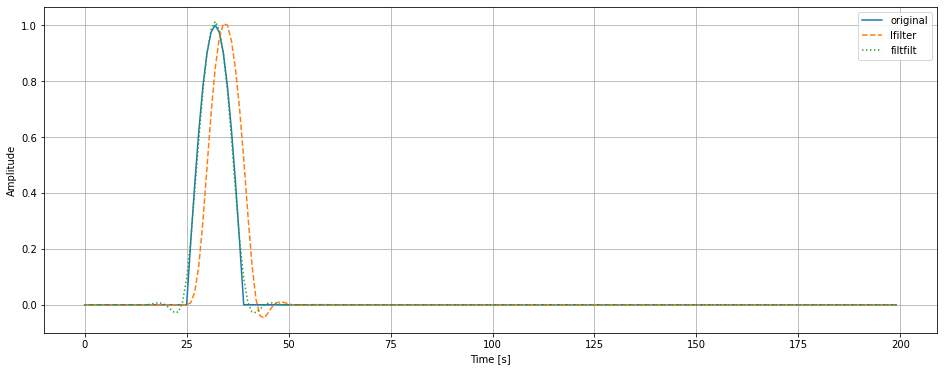

In [58]:
# Obtain filter coefficients for a simple digital low pass butterworth filter
b, a = ssignal.butter(3, 0.25, analog=False)

# filter using lfilter
signal_lfilter = ssignal.lfilter(b, a, signal)

# filter using lfilter
signal_filtfilt = ssignal.filtfilt(b, a, signal)

# Plot
fig, axes = plt.subplots(figsize=(16, 6))

# Plot the generated signal
axes.plot(time, signal, linestyle='-', label='original')
axes.plot(time, signal_lfilter, linestyle='--', label='lfilter')
axes.plot(time, signal_filtfilt, linestyle=':', label='filtfilt')

axes.grid()
axes.set_xlabel('Time [s]')
axes.set_ylabel('Amplitude')
axes.legend(loc='best')
plt.show();

What are the differences between the raw and filtered data. Are there differences between the different filters? Why?

When would you pick the arrivals for the different signals?

<div class="alert alert-danger">
    <b>Explanation:</b>
    There are
    <ul>
        <li><b>causal</b> - forward-in-time, depends only on past and present input like <em>lfilter</em></li>
    </ul>
    and
    <ul>
        <li><b>acausal</b> - zero-phase filter which needs future input for filtering like <em>filtfilt</em></li>
    </ul>
    filters
</div>


## Picking on filtered and noise free signals - Order of the filter

Not just the choice of the filter is important, but also its order. In the previous example we have chosen a 3<sup>rd</sup> order filter. But what would happen to our signal, when we use different orders like 1, 3 or even 10? Let's try:

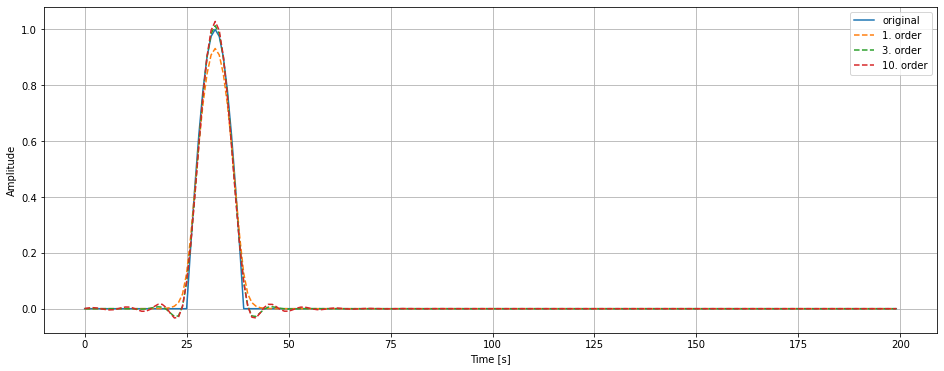

In [68]:
# Plot
fig, axes = plt.subplots(figsize=(16, 6))

# Plot the generated signal
axes.plot(time, signal, linestyle='-', label='original')

for order in (1, 3, 10):
    # Obtain filter coefficients for a simple digital low pass butterworth filter
    b, a = ssignal.butter(order, 0.25, analog=False)

    # filter using lfilter
    signal_filtfilt = ssignal.filtfilt(b, a, signal)

    axes.plot(time, signal_filtfilt, linestyle='--', label='{}. order'.format(order))

axes.grid()
axes.set_xlabel('Time [s]')
axes.set_ylabel('Amplitude')
axes.legend(loc='best')
plt.show();

## Picking on filtered and noisy signals

Real seismic records do contain noise - from wind, the ocean waves, tides, human activity... In order to generate a more realistic example, we will now add noise and check the resulting filtered trace using an acausal 3<sup>rd</sup> butterworth filter. We first generate a signal using our noise free input signal and some random noise:

In [74]:
# Generate noisy signal
noise = num.random.normal(
    0.,  # Mean of the noise
    num.abs(signal).max() / 10.,  # Standard deviation of the noise
    signal.shape[0])  # Length of the signal
signal_noise = signal + noise


Now we apply the filter to both signals:

In [75]:
# Filter
b, a = ssignal.butter(order, 0.25, analog=False)

# Filter the original signal
signal_filtfilt = ssignal.filtfilt(b, a, signal)

# Filter the noisy signal
signal_noise_filtfilt = ssignal.filtfilt(b, a, signal_noise)

Finally we can plot both input signals and resulting filtered traces:

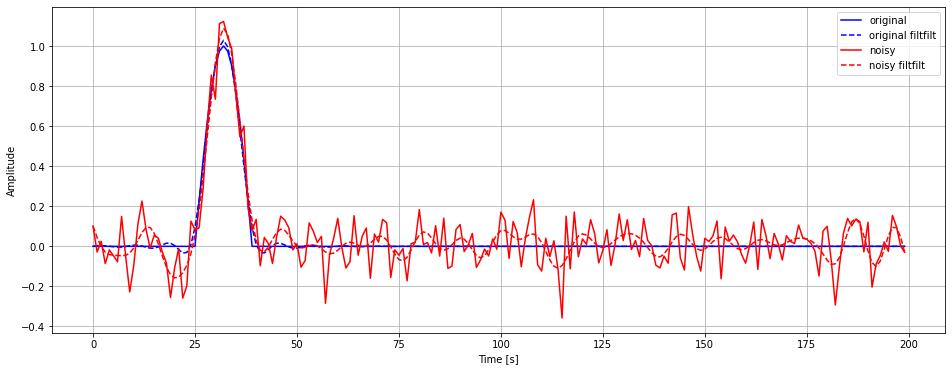

In [78]:
# Plot
fig, axes = plt.subplots(figsize=(16, 6))

# Plot the original signal
axes.plot(time, signal, color='b', linestyle='-', label='original')
axes.plot(time, signal_filtfilt, color='b', linestyle='--', label='original filtfilt')

# Plot the noisy signal
axes.plot(time, signal_noise, color='r', linestyle='-', label='noisy')
axes.plot(time, signal_noise_filtfilt, color='r', linestyle='--', label='noisy filtfilt')

axes.grid()
axes.set_xlabel('Time [s]')
axes.set_ylabel('Amplitude')
axes.legend(loc='best')
plt.show();

<div class="alert alert-warning">
    <b>Important to remember</b>
    <br>
    <ul>
        <li>Filters might change the phase of the signal so distort the arrival time - causal vs. acausal filters</li>
        <li>Filters generate artifacts and can smoothen signals</li>
        <li>Noise interferes with the actual signal and can cause difficulties to pick in both raw and filtered waveforms
    </ul>
</div>

## And now: Picking

So, now we know a bit of the different wave types and some of their characteristics. We also have gotten a first glimpse at different pitfalls on the way of picking.
Hence we can now try to find the different phases within our recorded signal and pick the arrival times for each of them. The **tasks** are:
* open the waveform signal in `Snuffler`.
* Pick the arrivals for the different wave types above.
    * Why have you choosen to pick at a certain time?
    * Why have you selected a certain wave type?
    * Is it easy to pick?
* Save the picks (Snuffler markers, if you search for help) for later usage.

## Solution:

<img src='img/GE_KTHA_pick_20201030.svg'>